# Classify handwritten digits using an Artificial Neural Network

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
dataset = pd.read_csv('./digit_data.csv')

In [3]:
dataset.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# converting dataframe 'dataset' into numpy array
dataset_np = dataset.values
no_data, no_features = dataset_np.shape

In [10]:
# shuffle the content of numpy array
np.random.shuffle(dataset_np)

In [17]:
# create a test set:
# use the first 1000 images of the dataset as the test set
# transpose the data
# take the remaining rows as teh feature of the test
# normalize the features values by dividing by 255

test_set = dataset_np[:1000].T
test_set_labels = test_set[0, :]
test_set_features = test_set[1:, :] / 255

In [19]:
# create a train set:
# use the remaining images of the dataset as the training set
# transpose teh data
# take the first row as the labels of the train set
# take the remaining rows as the features of the train set
# Normalize the feature values by dividing by 255

train_set = dataset_np[1000:].T
train_set_labels = train_set[0, :]
train_set_features = train_set[1:, :] / 255

In [25]:
train_set_features[:, 0].shape

(784,)

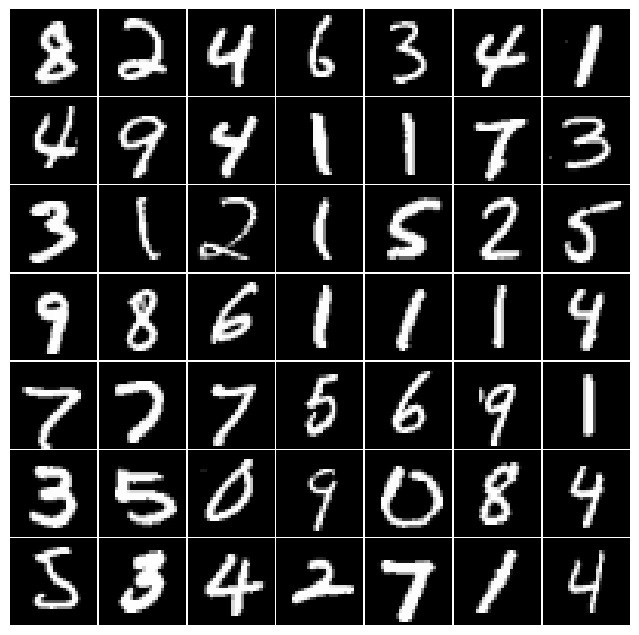

In [54]:
# Generate random index in the range dedicated for training images
# plot the image corresponding to the generated index
fig, axes = plt.subplots(7, 7, figsize=(8, 8))

# Randomly select 16 indices from the dataset (adjust as needed)
random_indices = np.random.choice(len(train_set_features[0]), 49, replace = False)
# Fill the subplots with images from the selected indices
for i, ax in enumerate(axes.flat):
    index = random_indices[i]
    image = train_set_features[:, index].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.grid(False)
    ax.axis('off')

# Adjust spacing between subplots for better visualization
# plt.tight_layout()
plt.subplots_adjust(wspace = 0.02, hspace = 0.02)

# Show the plot
plt.show()

In [152]:
def parameter_initialize():
    W1 = np.random.uniform(-0.5, 0.5, (10, 784))
    W2 = np.random.uniform(-0.5, 0.5, (10, 10))
    b1 = np.random.uniform(-0.5, 0.5, (10, 1))
    b2 = np.random.uniform(-0.5, 0.5, (10, 1))
    return W1, b1, W2, b2

In [153]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return 1.0 * (x > 0)

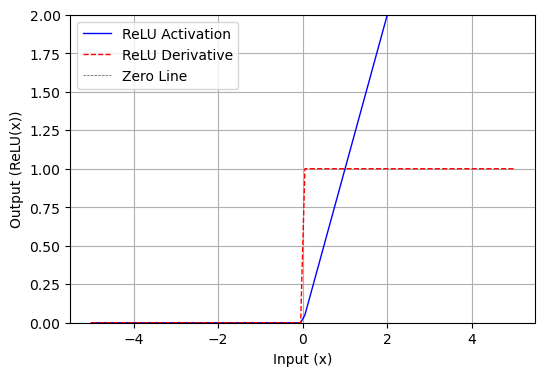

In [154]:
# Visualizing ReLU and its Derivative

x = np.linspace(-5, 5, 100)  
y = relu(x)
y_derivative = relu_derivative(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='ReLU Activation', color='b', linewidth = 1)
plt.plot(x, y_derivative, label="ReLU Derivative", color='r', linewidth = 1, linestyle = '--')

plt.ylim(0, 2)
plt.xlabel('Input (x)')
plt.ylabel('Output (ReLU(x))')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.7, label='Zero Line')
plt.legend()

plt.grid(True)
plt.show()

In [155]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

def softmax_derivative(x):
    s = softmax(x)
    return s * (1 - s)

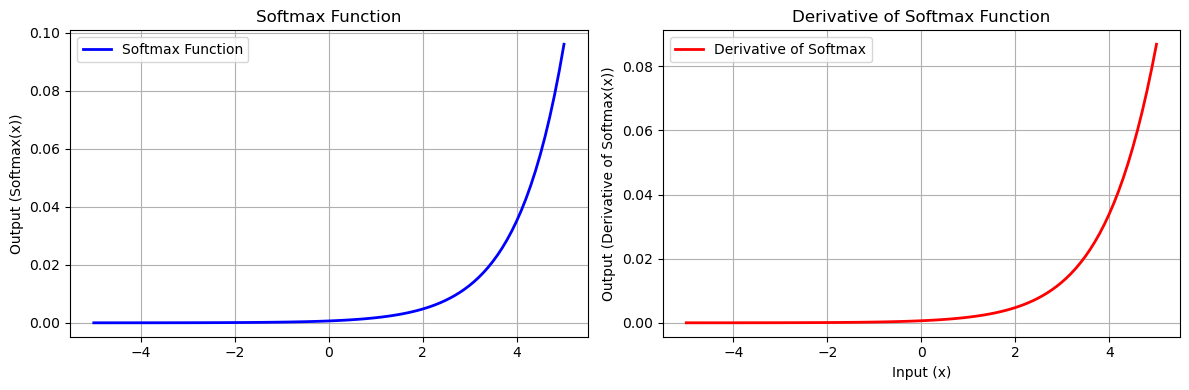

In [156]:
x = np.linspace(-5, 5, 100)
y_softmax = softmax(x)
y_derivative = softmax_derivative(x)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(x, y_softmax, label='Softmax Function', color='b', linewidth=2)
axes[0].set_ylabel('Output (Softmax(x))')
axes[0].set_title('Softmax Function')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(x, y_derivative, label='Derivative of Softmax', color='r', linewidth=2)
axes[1].set_xlabel('Input (x)')
axes[1].set_ylabel('Output (Derivative of Softmax(x))')
axes[1].set_title('Derivative of Softmax Function')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()

plt.show()

In [282]:
def parameter_initialize():
    W1 = np.random.uniform(-0.5, 0.5, (10, 784))
    W2 = np.random.uniform(-0.5, 0.5, (10, 10))
    b1 = np.random.uniform(-0.5, 0.5, (10, 1))
    b2 = np.random.uniform(-0.5, 0.5, (10, 1))
    return W1, b1, W2, b2

def forward_propagation(W1, b1, W2, b2, train_set_features):
    A0 = train_set_features
    Z1 = np.dot(W1, A0) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot_encode_array(digits):
    if not np.all((digits >= 0) & (digits <= 9)):
        raise ValueError("Digits must be in the range 0-9.")
    num_digits = len(digits)
    encoding = np.zeros((num_digits, 10)) 
    encoding[np.arange(num_digits), digits] = 1
    return encoding.T

def backward_propagation(Z1, A1, Z2, A2, train_set_features, train_set_labels):
    A0 = train_set_features
    n, m = A0.shape
    Y_OHE = one_hot_encode_array(train_set_labels)
    d_Z2 = A2 - Y_OHE
    d_W2 = 1 / m * np.dot(d_Z2, A1.T)
    d_b2 = 1 / m * np.sum(d_Z2, axis = 1)
    
    d_Z1 = np.dot(W2.T, d_Z2) * relu(Z1)
    d_W1 = 1 / m * np.dot(d_Z1, A0.T)
    d_b1 = 1 / m * np.sum(d_Z1, axis = 1)
    
    return d_W1, d_b1, d_W2, d_b2

def update_params(W1, b1, W2, b2, d_W1, d_b1, d_W2, d_b2, alpha):
    d_b1 = d_b1.reshape(10, 1)
    d_b2 = d_b2.reshape(10, 1)
    W1 = W1 - alpha * d_W1
    b1 = b1 - alpha * d_b1
    W2 = W2 - alpha * d_W2
    b2 = b2 - alpha * d_b2
    return W1, b1, W2, b2

def prediction(output_vec):
    return np.argmax(output_vec, axis = 0)

def accuracy(prediction, ground_truth):
    return np.sum(prediction == ground_truth) / len(ground_truth)

def gradient_descent(train_set_features, train_set_labels, alpha, no_iters):
    W1, b1, W2, b2 = parameter_initialize()
    A0 = train_set_features
    for i in range(no_iters):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, A0)
        d_W1, d_b1, d_W2, d_b2 = backward_propagation(Z1, A1, Z2, A2, A0, train_set_labels)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, d_W1, d_b1, d_W2, d_b2, alpha)
        if i % 100 == 0:
            print(f"Iteration: {i}\tAccuracy: {accuracy(prediction(A2), train_set_labels):.2f} %")

In [283]:
gradient_descent(train_set_features, train_set_labels, 1e-2, 1000)

Iteration: 0	Accuracy: 0.14 %
Iteration: 100	Accuracy: 0.22 %
Iteration: 200	Accuracy: 0.56 %
Iteration: 300	Accuracy: 0.68 %
Iteration: 400	Accuracy: 0.74 %
Iteration: 500	Accuracy: 0.75 %
Iteration: 600	Accuracy: 0.76 %
Iteration: 700	Accuracy: 0.76 %
Iteration: 800	Accuracy: 0.76 %
Iteration: 900	Accuracy: 0.75 %


In [308]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def one_hot_encode_array(digits):
  if not np.all((digits >= 0) & (digits <= 9)):
      raise ValueError("Digits must be in the range 0-9.")
  num_digits = len(digits)
  encoding = np.zeros((num_digits, 10)) 
  encoding[np.arange(num_digits), digits] = 1
  return encoding.T


class NeuralNetwork:
    def __init__(self, layer_sizes, activation_functions = None, weight_init = "random", dropout_probs=None):
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.dropout_probs = dropout_probs
        self.parameters = self.initialize_parameters(weight_init)
        self.activation_functions = activation_functions

    def initialize_parameters(self):
        parameters = {}
        for layer in range(1, self.num_layers):
            parameters[f'W{layer}'] = np.random.uniform(-0.5, 0.5, (self.layer_sizes[layer], self.layer_sizes[layer-1]))
            parameters[f'b{layer}'] = np.random.uniform(-0.5, 0.5, (self.layer_sizes[layer], 1))
        return parameters

    def initialize_parameters(self, weight_init):
        parameters = {}
        for layer in range(1, self.num_layers):
            if weight_init == "random":
                parameters[f'W{layer}'] = np.random.uniform(-0.5, 0.5, (self.layer_sizes[layer], self.layer_sizes[layer-1]))
            elif weight_init == "kaiming":
                parameters[f'W{layer}'] = np.random.randn(self.layer_sizes[layer], self.layer_sizes[layer-1]) * np.sqrt(2.0 / self.layer_sizes[layer-1])
            elif weight_init == "xavier":
                parameters[f'W{layer}'] = np.random.randn(self.layer_sizes[layer], self.layer_sizes[layer-1]) * np.sqrt(1.0 / self.layer_sizes[layer-1])
            else:
                raise ValueError("Invalid weight initialization method.")
                
            parameters[f'b{layer}'] = np.random.uniform(-0.5, 0.5, (self.layer_sizes[layer], 1))
        return parameters

    def forward_propagation(self, X):
        A = X
        cache = {}
        for layer in range(1, self.num_layers):
            Z = np.dot(self.parameters[f'W{layer}'], A) + self.parameters[f'b{layer}']
            if self.dropout_probs and layer < self.num_layers - 1:
                # Apply dropout if specified (excluding the output layer)
                D = (np.random.rand(*Z.shape) < (1 - self.dropout_probs[layer-1])).astype(int)
                A = self.apply_activation(Z, self.activation_functions[layer - 1]) * D / (1 - self.dropout_probs[layer-1])
                cache[f'D{layer}'] = D
            else:
                # if layer == self.num_layers - 1:
                #     A = softmax(Z)
                # else:
                #     A = relu(Z)
                A = self.apply_activation(Z, self.activation_functions[layer - 1])
            cache[f'Z{layer}'] = Z
            cache[f'Z{layer}'] = Z
            cache[f'A{layer}'] = A
        return cache

    def backward_propagation(self, cache, X, Y):
        m = X.shape[1]
        gradients = {}
        cache['A0'] = X
        for layer in range(self.num_layers - 1, 0, -1):
            if layer == self.num_layers - 1:
                dZ = cache['A' + str(layer)] - Y
            else:
                if self.dropout_probs:
                    dZ = np.dot(self.parameters[f'W{layer+1}'].T, gradients[f'dZ{layer+1}']) * (cache[f'D{layer}'] / (1 - self.dropout_probs[layer-1]))
                else:
                    dZ = np.dot(self.parameters[f'W{layer+1}'].T, gradients[f'dZ{layer+1}']) * relu(cache[f'Z{layer}'])
            dW = np.dot(dZ, cache['A' + str(layer-1)].T) / m
            db = np.sum(dZ, axis=1, keepdims=True) / m
            gradients[f'dZ{layer}'] = dZ
            gradients[f'dW{layer}'] = dW
            gradients[f'db{layer}'] = db
        return gradients

    def update_parameters(self, gradients, learning_rate):
        for layer in range(1, self.num_layers):
            self.parameters[f'W{layer}'] -= learning_rate * gradients[f'dW{layer}']
            self.parameters[f'b{layer}'] -= learning_rate * gradients[f'db{layer}']

    def train(self, X, Y, learning_rate, num_iterations):
        # Ensure Y is one-hot encoded and has the same shape as predictions
        Y = one_hot_encode_array(Y)
        print(Y.shape)
        if Y.shape != (self.layer_sizes[-1], X.shape[1]):
            raise ValueError(f"Shape mismatch: Y should have shape {(self.layer_sizes[-1], X.shape[1])} when using one-hot encoding.")

        for i in range(num_iterations):
            cache = self.forward_propagation(X)
            gradients = self.backward_propagation(cache, X, Y)
            self.update_parameters(gradients, learning_rate)
            if i % 5 == 0:
                A2 = cache['A' + str(self.num_layers - 1)]
                loss = self.categorical_cross_entropy(A2, Y)

                print(f"Iteration: {i}\tLoss: {loss:.4f}\tAccuracy: {self.compute_accuracy(A2, Y):.2f} %")
    
    def categorical_cross_entropy(self, A, Y):
        m = Y.shape[1]
        loss = -np.sum(Y * np.log(A + 1e-15)) / m  # Adding a small epsilon to prevent log(0)
        return loss

    def test(self, X_test, Y_test):
        cache = self.forward_propagation(X_test)
        A2 = cache['A' + str(self.num_layers - 1)]
        accuracy = self.compute_accuracy(A2, Y_test)
        print(f"Test Accuracy: {accuracy:.2f} %")
        return accuracy

    def predict(self, X):
        cache = self.forward_propagation(X)
        A2 = cache['A' + str(self.num_layers - 1)]
        return A2

    def compute_accuracy(self, A, Y):
        predictions = np.argmax(A, axis=0)
        ground_truth = np.argmax(Y, axis=0)
        return np.sum(predictions == ground_truth) / Y.shape[1]

    def apply_activation(self, Z, activation_function):
        if activation_function == "sigmoid":
            return sigmoid(Z)
        elif activation_function == "tanh":
            return tanh(Z)
        elif activation_function == "relu":
            return relu(Z)
        elif activation_function == 'softmax':
            return softmax(Z)
        else:
            raise ValueError("Invalid activation function.")

In [309]:
layer_sizes = [784, 10, 10]  
dropout_probs = [0.5]  
activation_functions = ["relu", "softmax"]


nn = NeuralNetwork(layer_sizes, activation_functions = activation_functions)
nn.train(train_set_features, train_set_labels, learning_rate = 0.01, num_iterations = 2000)

(10, 41000)
Iteration: 0	Loss: 3.0446	Accuracy: 0.14 %
Iteration: 5	Loss: 2.7579	Accuracy: 0.14 %
Iteration: 10	Loss: 2.6003	Accuracy: 0.15 %
Iteration: 15	Loss: 2.5008	Accuracy: 0.15 %
Iteration: 20	Loss: 2.4324	Accuracy: 0.16 %
Iteration: 25	Loss: 2.3825	Accuracy: 0.16 %
Iteration: 30	Loss: 2.3443	Accuracy: 0.17 %
Iteration: 35	Loss: 2.3139	Accuracy: 0.17 %
Iteration: 40	Loss: 2.2891	Accuracy: 0.18 %
Iteration: 45	Loss: 2.2682	Accuracy: 0.18 %
Iteration: 50	Loss: 2.2503	Accuracy: 0.18 %
Iteration: 55	Loss: 2.2346	Accuracy: 0.18 %
Iteration: 60	Loss: 2.2206	Accuracy: 0.19 %
Iteration: 65	Loss: 2.2080	Accuracy: 0.19 %
Iteration: 70	Loss: 2.1966	Accuracy: 0.19 %
Iteration: 75	Loss: 2.1860	Accuracy: 0.19 %
Iteration: 80	Loss: 2.1762	Accuracy: 0.20 %
Iteration: 85	Loss: 2.1670	Accuracy: 0.20 %
Iteration: 90	Loss: 2.1583	Accuracy: 0.20 %
Iteration: 95	Loss: 2.1500	Accuracy: 0.20 %
Iteration: 100	Loss: 2.1421	Accuracy: 0.20 %
Iteration: 105	Loss: 2.1345	Accuracy: 0.20 %
Iteration: 110	Loss:

Iteration: 915	Loss: 1.2462	Accuracy: 0.57 %
Iteration: 920	Loss: 1.2415	Accuracy: 0.58 %
Iteration: 925	Loss: 1.2368	Accuracy: 0.58 %
Iteration: 930	Loss: 1.2321	Accuracy: 0.58 %
Iteration: 935	Loss: 1.2275	Accuracy: 0.58 %
Iteration: 940	Loss: 1.2228	Accuracy: 0.58 %
Iteration: 945	Loss: 1.2181	Accuracy: 0.59 %
Iteration: 950	Loss: 1.2134	Accuracy: 0.59 %
Iteration: 955	Loss: 1.2088	Accuracy: 0.59 %
Iteration: 960	Loss: 1.2041	Accuracy: 0.59 %
Iteration: 965	Loss: 1.1994	Accuracy: 0.59 %
Iteration: 970	Loss: 1.1948	Accuracy: 0.59 %
Iteration: 975	Loss: 1.1901	Accuracy: 0.60 %
Iteration: 980	Loss: 1.1855	Accuracy: 0.60 %
Iteration: 985	Loss: 1.1808	Accuracy: 0.60 %
Iteration: 990	Loss: 1.1762	Accuracy: 0.60 %
Iteration: 995	Loss: 1.1715	Accuracy: 0.60 %
Iteration: 1000	Loss: 1.1669	Accuracy: 0.60 %
Iteration: 1005	Loss: 1.1622	Accuracy: 0.61 %
Iteration: 1010	Loss: 1.1576	Accuracy: 0.61 %
Iteration: 1015	Loss: 1.1530	Accuracy: 0.61 %
Iteration: 1020	Loss: 1.1483	Accuracy: 0.61 %
Itera

Iteration: 1810	Loss: 0.6801	Accuracy: 0.79 %
Iteration: 1815	Loss: 0.6786	Accuracy: 0.79 %
Iteration: 1820	Loss: 0.6770	Accuracy: 0.79 %
Iteration: 1825	Loss: 0.6755	Accuracy: 0.79 %
Iteration: 1830	Loss: 0.6740	Accuracy: 0.79 %
Iteration: 1835	Loss: 0.6725	Accuracy: 0.79 %
Iteration: 1840	Loss: 0.6711	Accuracy: 0.79 %
Iteration: 1845	Loss: 0.6696	Accuracy: 0.79 %
Iteration: 1850	Loss: 0.6681	Accuracy: 0.79 %
Iteration: 1855	Loss: 0.6667	Accuracy: 0.79 %
Iteration: 1860	Loss: 0.6652	Accuracy: 0.79 %
Iteration: 1865	Loss: 0.6638	Accuracy: 0.79 %
Iteration: 1870	Loss: 0.6624	Accuracy: 0.79 %
Iteration: 1875	Loss: 0.6610	Accuracy: 0.80 %
Iteration: 1880	Loss: 0.6596	Accuracy: 0.80 %
Iteration: 1885	Loss: 0.6582	Accuracy: 0.80 %
Iteration: 1890	Loss: 0.6568	Accuracy: 0.80 %
Iteration: 1895	Loss: 0.6554	Accuracy: 0.80 %
Iteration: 1900	Loss: 0.6541	Accuracy: 0.80 %
Iteration: 1905	Loss: 0.6527	Accuracy: 0.80 %
Iteration: 1910	Loss: 0.6514	Accuracy: 0.80 %
Iteration: 1915	Loss: 0.6500	Accur